In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
import numpy as np
import seaborn  as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
df_train=pd.read_csv("../input/random-linear-regression/train.csv")

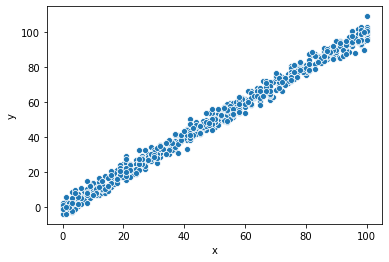

In [6]:
sns.scatterplot(data=df_train, x="x", y="y")

In [7]:
#Check if there is any missing value 
df_train.isnull().sum()

x    0
y    1
dtype: int64

In [8]:
df_train=df_train.dropna()

In [9]:
X=np.asanyarray(df_train[['x']])

In [10]:
y=np.asanyarray(df_train[['y']])

In [11]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [12]:
lm = LinearRegression()   # Create a linear regression object
lm.fit(X_train, y_train)

LinearRegression()

In [13]:
print(lm.intercept_)
print(lm.coef_)

[0.12613937]
[[0.99624288]]


In [14]:
y_pred = lm.predict(X_test)

In [16]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.9230123305504514

In [17]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9902557261720687

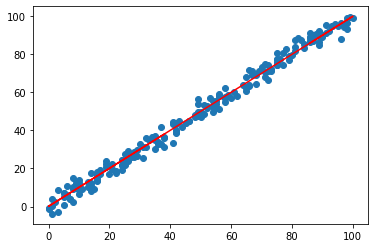

In [18]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 0.12613937 + 0.99624288 * X_test, 'r')
plt.show()

In [19]:
#Read Test Dataset
df_test=pd.read_csv("../input/random-linear-regression/test.csv")

In [21]:
df_test_x = df_test[["x"]]
df_test_y = df_test[["y"]]

In [22]:
#Predict on test dataset
y_pred = lm.predict(df_test_x)

In [23]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(df_test_y, y_pred))

3.0887965196497924

In [24]:
r_squared = r2_score(df_test_y, y_pred)
r_squared

0.9886735358245166

In [ ]:
plt.scatter(df_test_x, df_test_y)
plt.plot(df_test_x, 0.12613937 + 0.99624288 * df_test_x, 'r')
plt.show()